# Final model after hyperparameter tuning

In [3]:
# Importing correct packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Machine Learning Libraries
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Figures
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    plot_confusion_matrix
)

In [4]:
# Remove missing
df = pd.read_csv("/content/Period_1_Game_Stats_Final_ModelReady.csv")
df = df[:-9611]
df.drop(df.index[18800:40871],0,inplace=True)
df = df.reset_index(drop=True)
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


won                      0
Shots                    0
Shots_Against            0
Goals                    0
Goals_Against            0
Takeaways                0
Takeaways_Against        0
Hits                     0
Hits_Against             0
Blocked Shots            0
Blocked Shots Against    0
Giveaways                0
Giveaways_Against        0
Missed Shots             0
Missed Shots_Against     0
Penalities               0
Penalities_Against       0
#Won Faceoffs            0
#Lost Faceoffs           0
HoA_away                 0
HoA_home                 0
dtype: int64

In [5]:
# split data into X and y
y = df.pop('won')
X = df

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [6]:
# Final Lightgbm.LGBMClassifier model
final_model = lgb.LGBMClassifier(learning_rate=0.04, max_depth=10, num_leaves = 31, random_state=42)
final_model.fit(X_train,y_train)
final_model.score(X_test, y_test)

0.6643292682926829

In [7]:
# Define some helpful functions
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Validation Result:

accuracy score: 0.6643



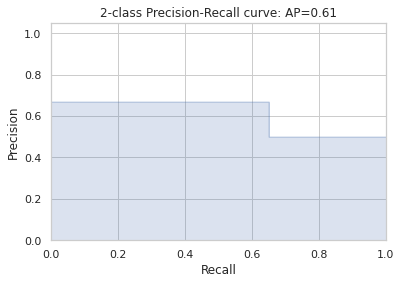

roc auc score: 0.6643380667527019



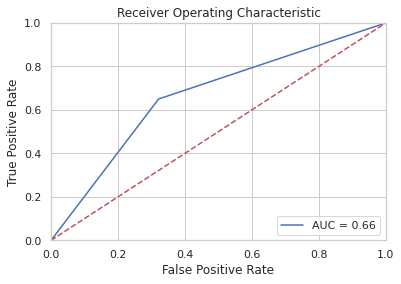

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.68      0.67      3278
           1       0.67      0.65      0.66      3282

    accuracy                           0.66      6560
   macro avg       0.66      0.66      0.66      6560
weighted avg       0.66      0.66      0.66      6560


Confusion Matrix: 
 [[2225 1053]
 [1149 2133]]

End of validation Result



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


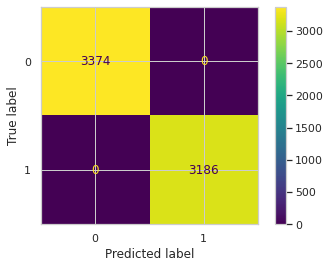

In [8]:
# classification report
clf_score(final_model, X_train, y_train, X_test, y_test, train=False)